<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
</head>
<body>
    <h2>EXP 8</h2>
    <h2>Date:01/10/2024</h2>
    <h2>Reg No:URK22CS5090</h2><br>
    <center><h1>Performance Analysis on Decision Tree Classification Technique</h1></center>
    <h4><b>Aim</b></h4>
    <p>To Develop a Decision Tree classification model for the Social_Network dataset using the scikit-learn.</p>
    <h4><b>Description<b></h4>
        <p>
Decision Tree is the most powerful and popular tool for classification and
prediction. A Decision tree is a flowchart-like tree structure, where each internal
node denotes a test on an attribute, each branch represents an outcome of the
test, and each leaf node (terminal node) holds a class label.</p>
    </p>
         
</body>
</html>

In [148]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt

print("SetUp Complete")

SetUp Complete


In [95]:
df=pd.read_csv("Social_Network.csv")

<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    
</head>
<body>
    <p><b>1. Develop a Decision Tree classification model for the Social_Network dataset using the
scikit-learn<br>
a. Use the columns: 'Gender', 'Age', 'EstimatedSalary' as the independent variables<br>
    b. Use the target variable as 'Purchased' (Yes-Y, No-N)</b></p>
</body>
</html>

In [97]:
X = df[['Gender', 'Age', 'EstimatedSalary']]
y = df['Purchased']

<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    
</head>
<body>
    <p><b>c. Encode the categorical value of the target column to numerical value</b></p>
</body>
</html>

In [99]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    
</head>
<body>
    <p><b>d. Divide the data into training (75%) and testing set (25%)</b></p>
</body>
</html>

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    
</head>
<body>
    <p><b>e. Perform the classification with entropy and information gain as decision criteria in
decision tree</b></p>
</body>
</html>

In [103]:
classifier = DecisionTreeClassifier(criterion='entropy')
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    
</head>
<body>
    <p><b>f. Analyse the performance of the classifier with various performance measures such as
confusion matrix, accuracy, recall, precision, specificity, f-score, Receiver operating
characteristic (ROC) curve and Area Under Curve (AUC) score</b></p>
</body>
</html>

In [105]:
y_pred = classifier.predict(X_test)

confusion_mat = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f_score = f1_score(y_test, y_pred)

specificity = confusion_mat[0, 0] / (confusion_mat[0, 0] + confusion_mat[0, 1])

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

Accuracy: 0.92
Recall: 0.9090909090909091
Precision: 0.8571428571428571
Specificity: 0.9253731343283582
F-Score: 0.8823529411764706
AUC: 0.9172320217096337


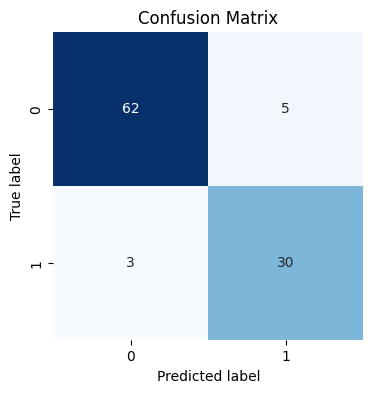

In [107]:
print('Accuracy:', accuracy)
print('Recall:', recall)
print('Precision:', precision)
print('Specificity:', specificity)
print('F-Score:', f_score)
print('AUC:', roc_auc)
plt.figure(figsize=(4,4))
sns.heatmap(confusion_mat, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    
</head>
<body>
    <p><b>g. Display the constructed decision tree sklearn.tree.plot_tree method</b></p>
</body>
</html>

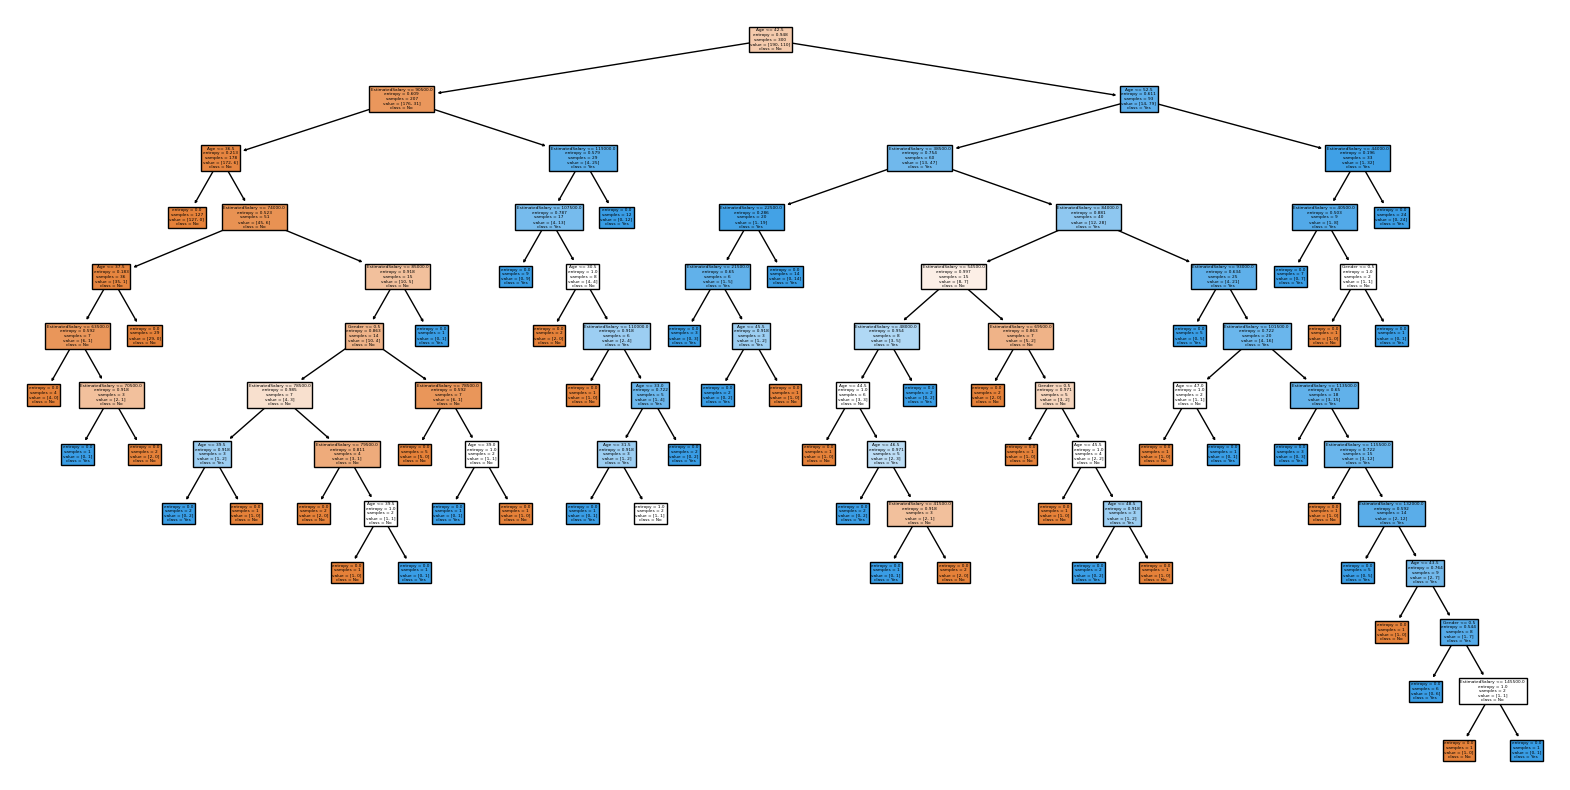

In [115]:
plt.figure(figsize=(20, 10))
class_names = label_encoder.classes_.astype(str).tolist()
plot_tree(classifier, feature_names=X.columns.tolist(), class_names=class_names, filled=True)
plt.show()


<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    
</head>
<body>
    <p><b>h. Prune the tree with maximum depth as 3,5,7 and tabulate the various TP, TN, accuracy,
f-score and AUC score obtained</b></p>
</body>
</html>

In [88]:
results = []
depths = [None, 3, 5, 7]
for d in depths:
    classifier = DecisionTreeClassifier(max_depth=d)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    y_prob = classifier.predict_proba(X_test)[:, 1]  
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    accuracy = accuracy_score(y_test, y_pred)
    fscore = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)
    results.append({
        'Max Depth': 'Default' if d is None else d,
        'TP': tp,
        'TN': tn,
        'Accuracy': accuracy,
        'F-score': fscore,
        'AUC score': auc
    })
results_df = pd.DataFrame(results)
print(results_df)


  Max Depth  TP  TN  Accuracy   F-score  AUC score
0   Default  27  60      0.87  0.805970   0.855495
1         3  30  60      0.90  0.857143   0.941429
2         5  27  65      0.92  0.870968   0.937811
3         7  27  61      0.88  0.818182   0.863863


<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    
</head>
<body>
    <p><b>Result :</b></p>
    <p>To Develop a Decision Tree classification model for the Social_Network dataset
using the scikit-learn is executed successfullly.</p>
</body>
</html>